# Linear Regression with One Variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("data.txt",header=None,names=['popcity','profit'])

In [3]:
df.head(10)

,popcity,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


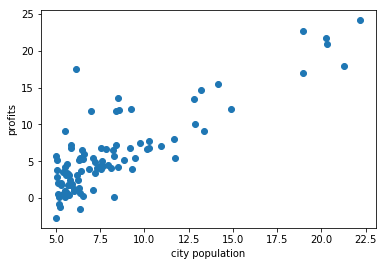

In [4]:
plt.scatter(df.popcity,df.profit)
plt.xlabel("city population")
plt.ylabel("profits")
plt.show()

we can infer that the plot is following a linear trend

In [5]:
df.describe()

,popcity,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
dt=df
dt.insert(0,'theta0',1)

In [7]:
dt.head()

,theta0,popcity,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [8]:
X=dt.iloc[:,0:2]
Y=dt.iloc[:,2:3]
z=dt.iloc[:,1:2]

In [9]:
X.head()

,theta0,popcity
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
Y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [11]:
X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta = np.matrix(np.array([0,0]))
#initialised theta as 0,0

In [12]:
#X

In [13]:
#Y

In [14]:
X.shape,theta.shape,Y.shape

((97, 2), (1, 2), (97, 1))

In [15]:
def compute_cost(X,y,theta):
    return np.sum(np.power(X*theta.T-y,2))/(2*len(X))

In [16]:
compute_cost(X,Y,theta)

32.072733877455676

In [17]:
iterations=10000
alpha=0.01

In [18]:
def gradientdescent(X, y, theta, alpha, iterations):
    iters=np.zeros(iterations)
    for i in range(iterations):
        diff=(X*theta.T)-y
        gradient=((X.T)*diff)/len(X)
        theta=theta-(alpha*(gradient.T))
        cost=compute_cost(X,y,theta)
        iters[i]=compute_cost(X,y,theta)#this stores the cost after each iteration
    return theta,iters

In [19]:
optimised_theta,iters=gradientdescent(X,Y,theta,alpha,iterations)

In [20]:
optimised_theta

matrix([[-3.89578082,  1.19303364]])

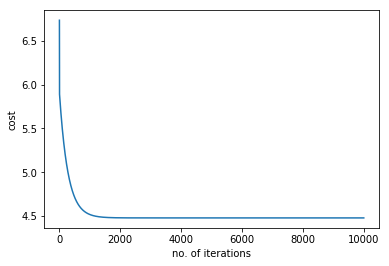

In [21]:
plt.plot(np.arange(iterations),iters)
plt.xlabel('no. of iterations')
plt.ylabel('cost')
plt.show()

we see that cost is reducing as no. of iterations reach 10000,hence we can take this value as minimum

In [22]:
compute_cost(X,Y,optimised_theta)

4.476971375975179

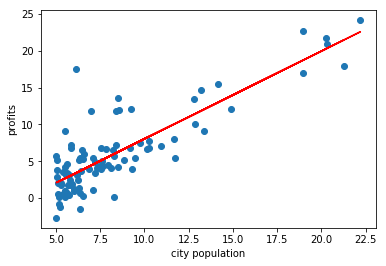

In [23]:
plt.scatter(df.popcity,df.profit)
plt.xlabel("city population")
plt.ylabel("profits")
plt.plot(df.popcity,((df['popcity']*optimised_theta[0,1])+optimised_theta[0,0]),'r')
plt.show()


In [24]:
optimised_theta[0,0]

-3.895780820268237

In [25]:
def profit_pred(x):
    return (((x/10000)*optimised_theta[0,1])+optimised_theta[0,0])*10000

the above function calculates the predicted profit based on the population of a city,since the valus in df are already randomised i multiplied by 10000 to find the actual profit in euros(i found out it was 10000 from the internet)

In [26]:
profit_pred(35000)

2798.3691398645274

In [27]:
profit_pred(70000)

44554.546482411424

## using sklearn

In [28]:
#storing population values as a np matrix 
z=dt.iloc[:,1:2]
z = np.matrix(z.values)

In [29]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
x=z
y=Y
regr.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
regr.coef_

array([[1.19303364]])

In [31]:
regr.intercept_

array([-3.89578088])

In [32]:
coeff=regr.coef_[0,0]

In [33]:
intercept=regr.intercept_[0]

In [34]:
def profit(x):
    return (((x/10000)*coeff)+intercept)*10000

In [35]:
profit(35000)

2798.3687635172673

In [36]:
profit(70000)

44554.54631015303


we notice that the predicted profit for population values 35000 and 70000 is nearly the same